# 2. Customer Segmentation: Exploratory Data Analysis (EDA)

## Introduction

This project builds on the cleaned customer segmentation dataset to perform exploratory data analysis (EDA). The goal is to understand key patterns, relationships, and differences among customer groups, as well as to identify insights that can inform segmentation strategies.

The dataset contains rich demographic, behavioral, and preference data, making it suitable for analyzing customer distribution, income trends, and segmentation patterns.

---

## Objectives

1. **Income Analysis**:
   - Explore the distribution of income levels to identify key customer brackets.

2. **Segmentation Group Analysis**:
   - Visualize the distribution of customers across segmentation groups.
   - Examine how features like income and age vary across these groups.

3. **Feature Relationships**:
   - Study relationships between key features such as `Age`, `Income Level`, `Coverage Amount`, and `Premium Amount`.
   - Use visual tools like hexbin plots, 2D histograms, and pairplots to analyze feature interactions.

4. **Correlation Analysis**:
   - Assess correlations between numerical features to determine if any relationships drive segmentation.

5. **Insights by Age Groups**:
   - Create age bins and analyze income distributions across different age and segmentation groups.

---

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\Zana\Desktop\portfolio_projects\project_2\cleaned_customer_segmentation_data.csv")
df.head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,2018-04-10,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,2018-11-06,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,2021-06-05,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,2018-09-02,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,2018-09-10,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


# Exploratory Data Analysis (EDA)

### Distribution of Income Level with KDE

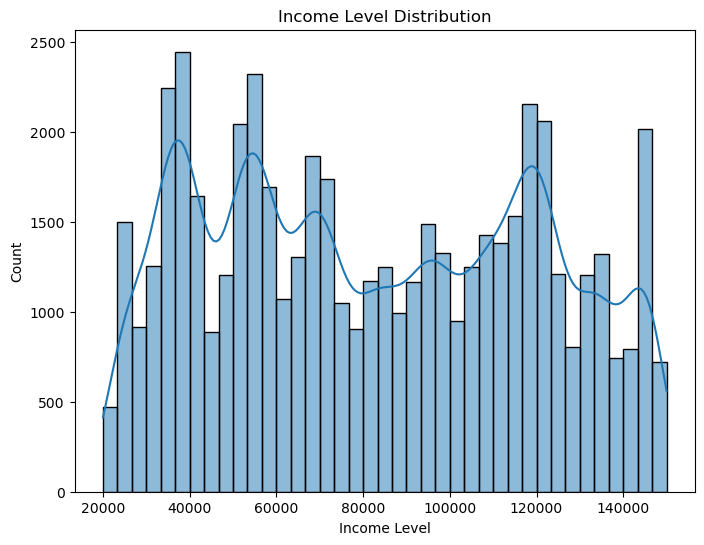

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of Income Level
plt.figure(figsize=(8, 6))
sns.histplot(df['Income Level'], kde=True)
plt.title('Income Level Distribution')
plt.show()

### Segment Analysis

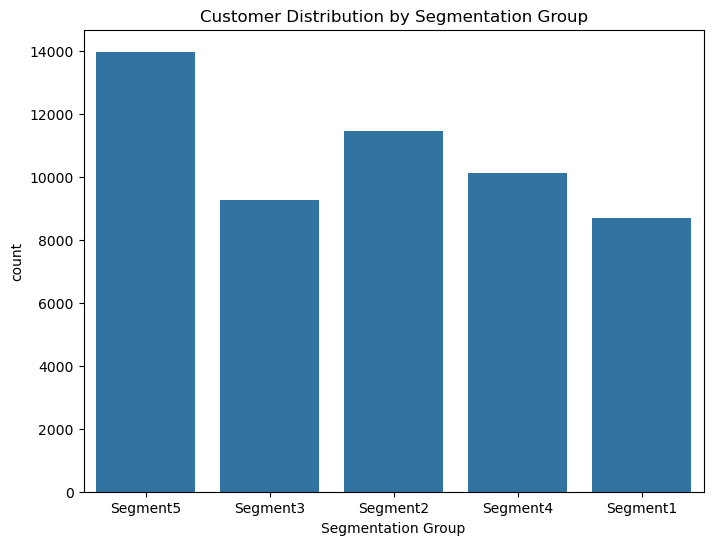

In [3]:
# Bar plot of Segmentation Group
plt.figure(figsize=(8, 6))
sns.countplot(x='Segmentation Group', data=df)
plt.title('Customer Distribution by Segmentation Group')
plt.show()

### Relationship between "Age" and "Income Level" across customer segmentation dataset

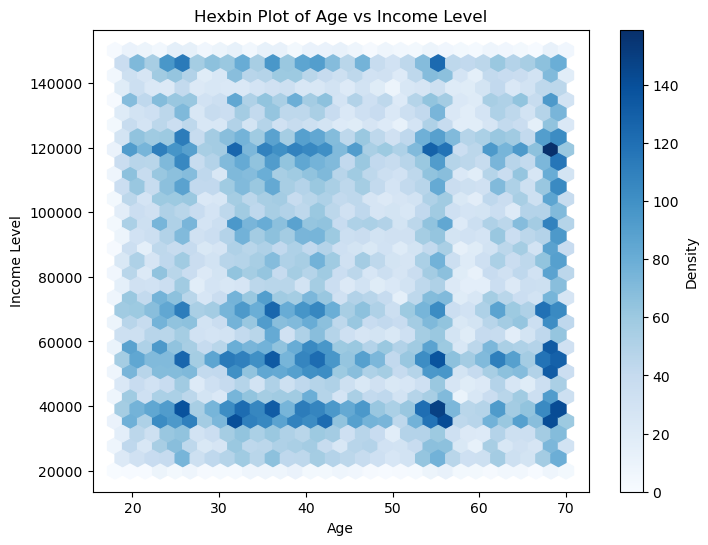

In [9]:
plt.figure(figsize=(8, 6))
plt.hexbin(df['Age'], df['Income Level'], gridsize=30, cmap='Blues')
plt.colorbar(label='Density')
plt.title('Hexbin Plot of Age vs Income Level')
plt.xlabel('Age')
plt.ylabel('Income Level')
plt.show()

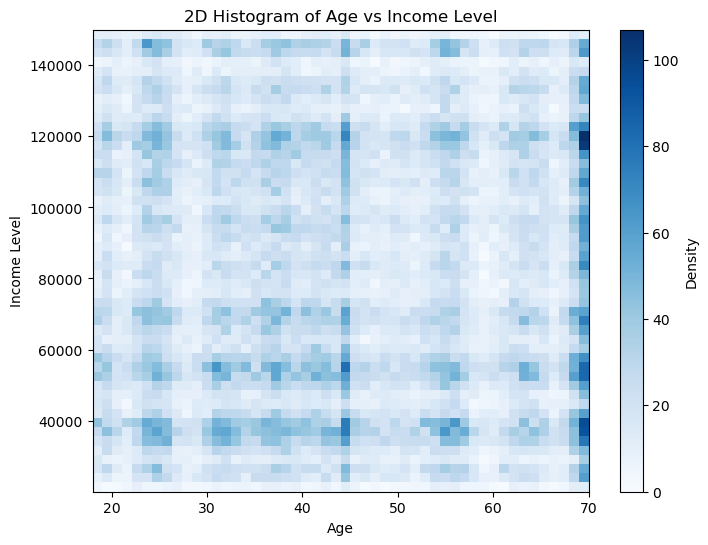

In [10]:
plt.figure(figsize=(8, 6))
plt.hist2d(df['Age'], df['Income Level'], bins=50, cmap='Blues')
plt.colorbar(label='Density')
plt.title('2D Histogram of Age vs Income Level')
plt.xlabel('Age')
plt.ylabel('Income Level')
plt.show()

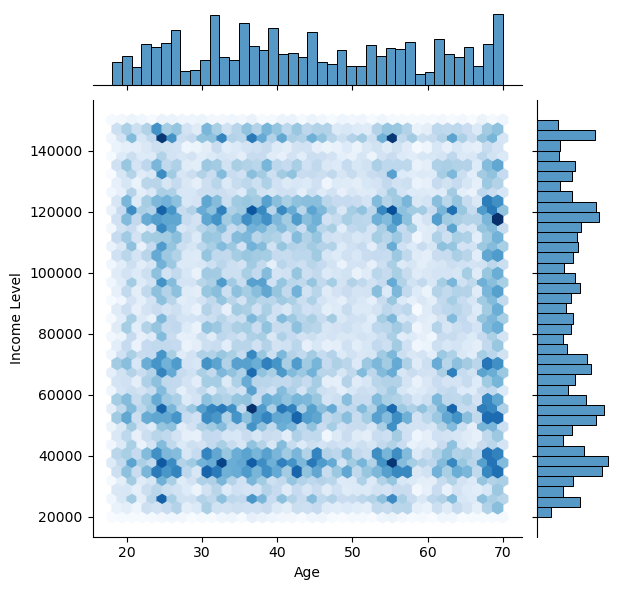

In [11]:
sns.jointplot(x='Age', y='Income Level', data=df, kind='hex', cmap='Blues')
plt.show()

### Correlation Analysis

In [12]:
# Correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Female'

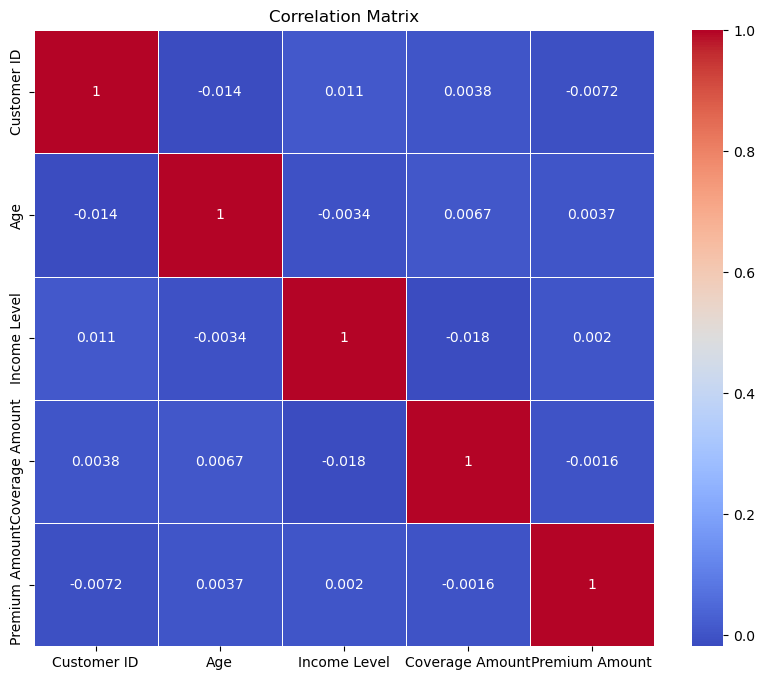

In [13]:
# Selecting only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Encoded Categorical Variables

In [16]:
!pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.0 MB 8.4 MB/s eta 0:00:02
   ---------- ----------------------------- 2.9/11.0 MB 8.0 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/11.0 MB 7.7 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.0 MB 8.2 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.0 MB 8.1 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/11.0 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 8.2 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)


In [19]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Encode categorical columns 'Gender' and 'Marital Status'
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['Marital Status'] = labelencoder.fit_transform(df['Marital Status'])

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Associate Degree'

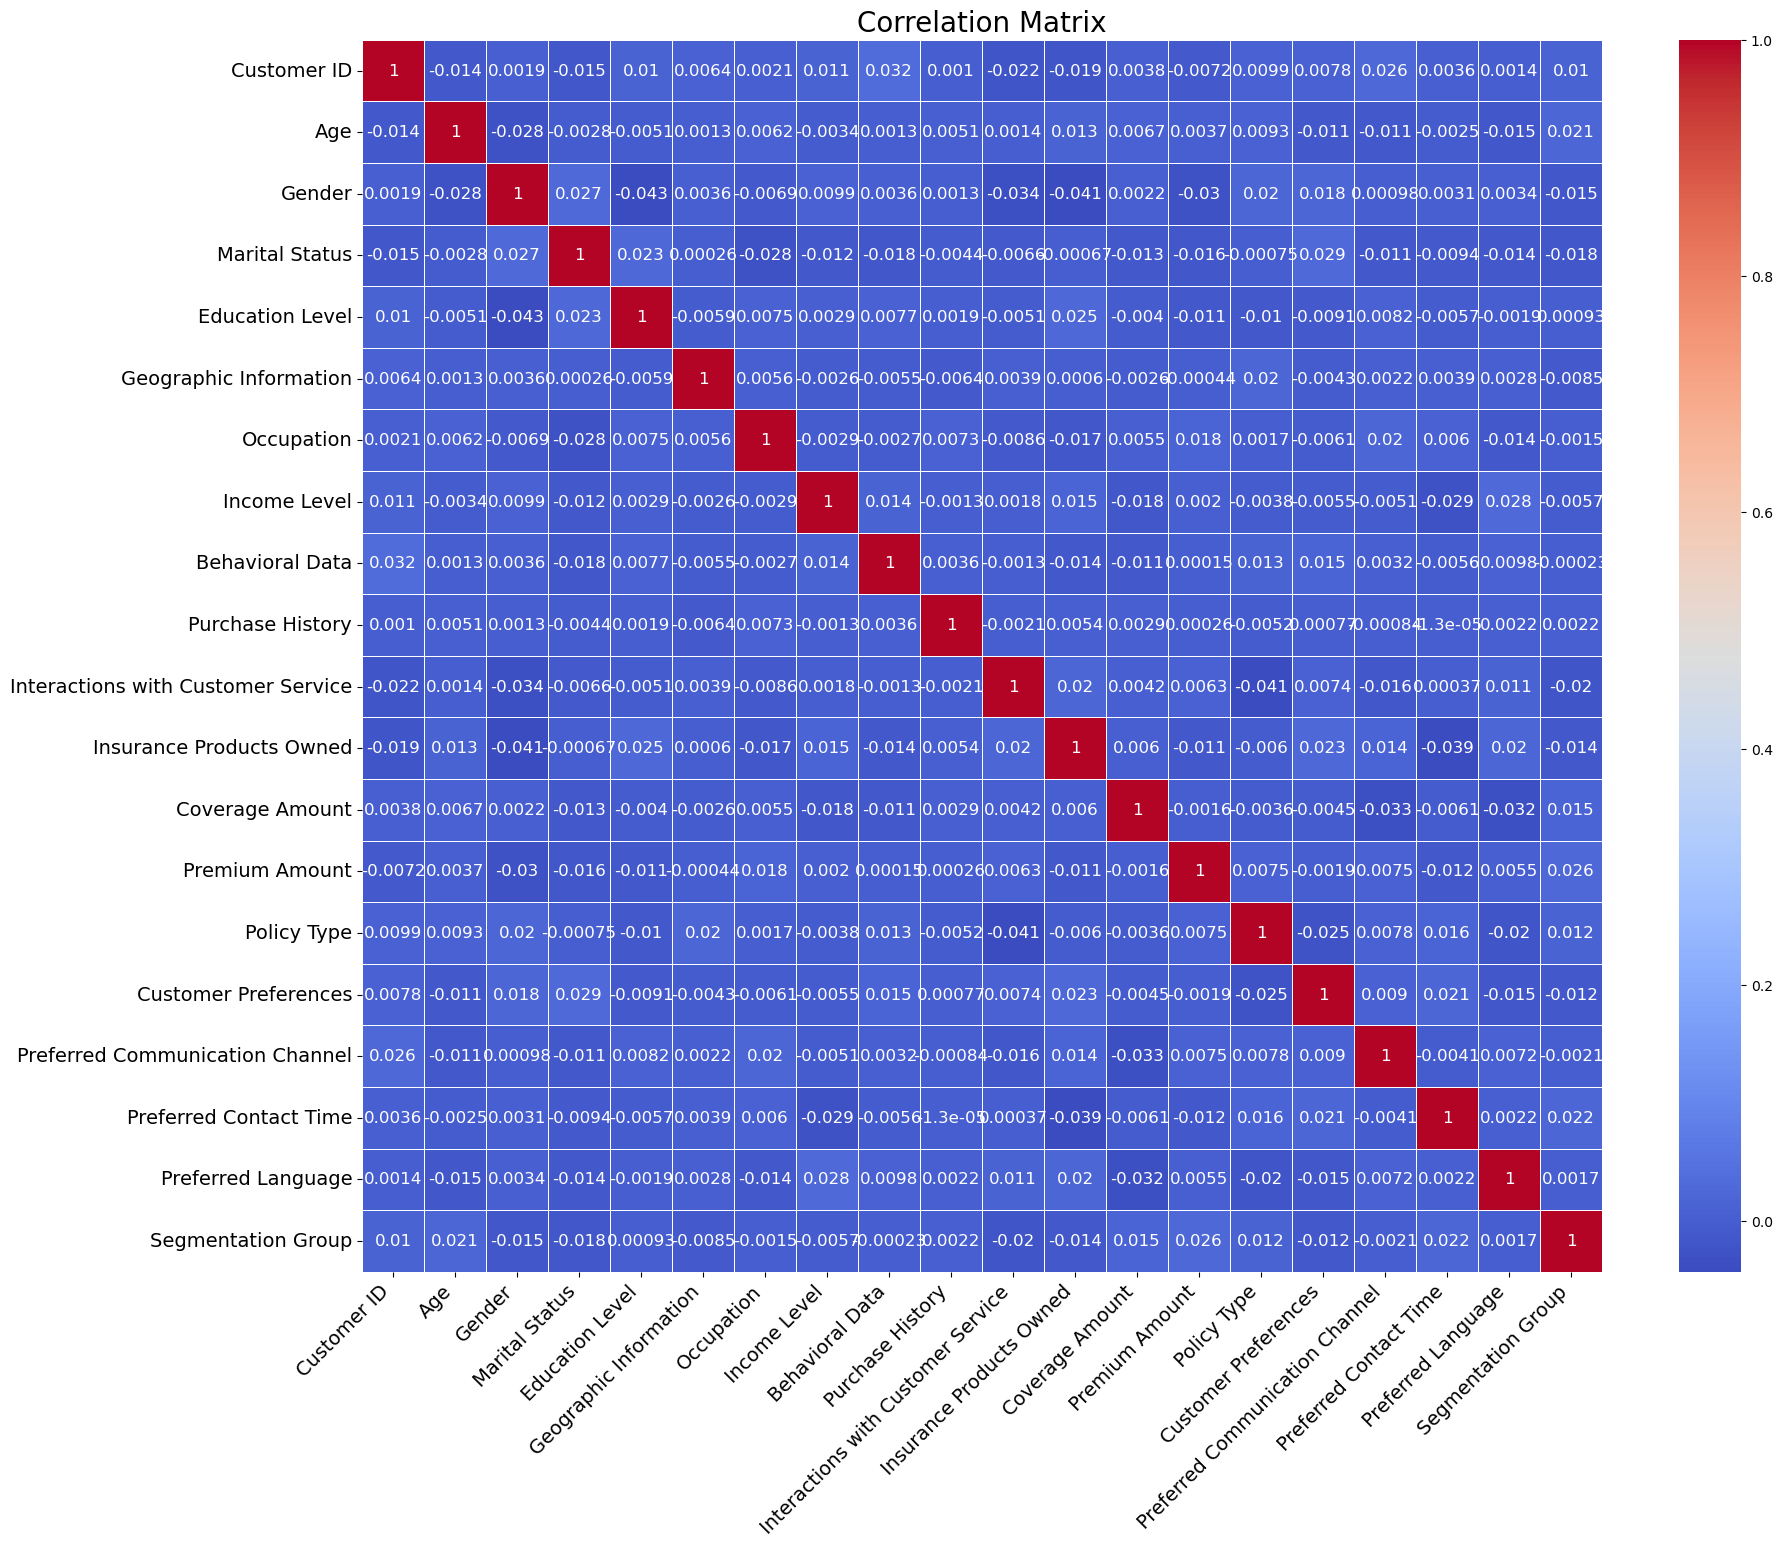

In [22]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Automatically encode all categorical columns in the DataFrame
labelencoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = labelencoder.fit_transform(df[column])

# Calculate the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(20, 16))  # Increase the figure size even more
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 12})  # Increase annotation font size
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=14)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=14)  # Increase y-axis labels font size
plt.show()

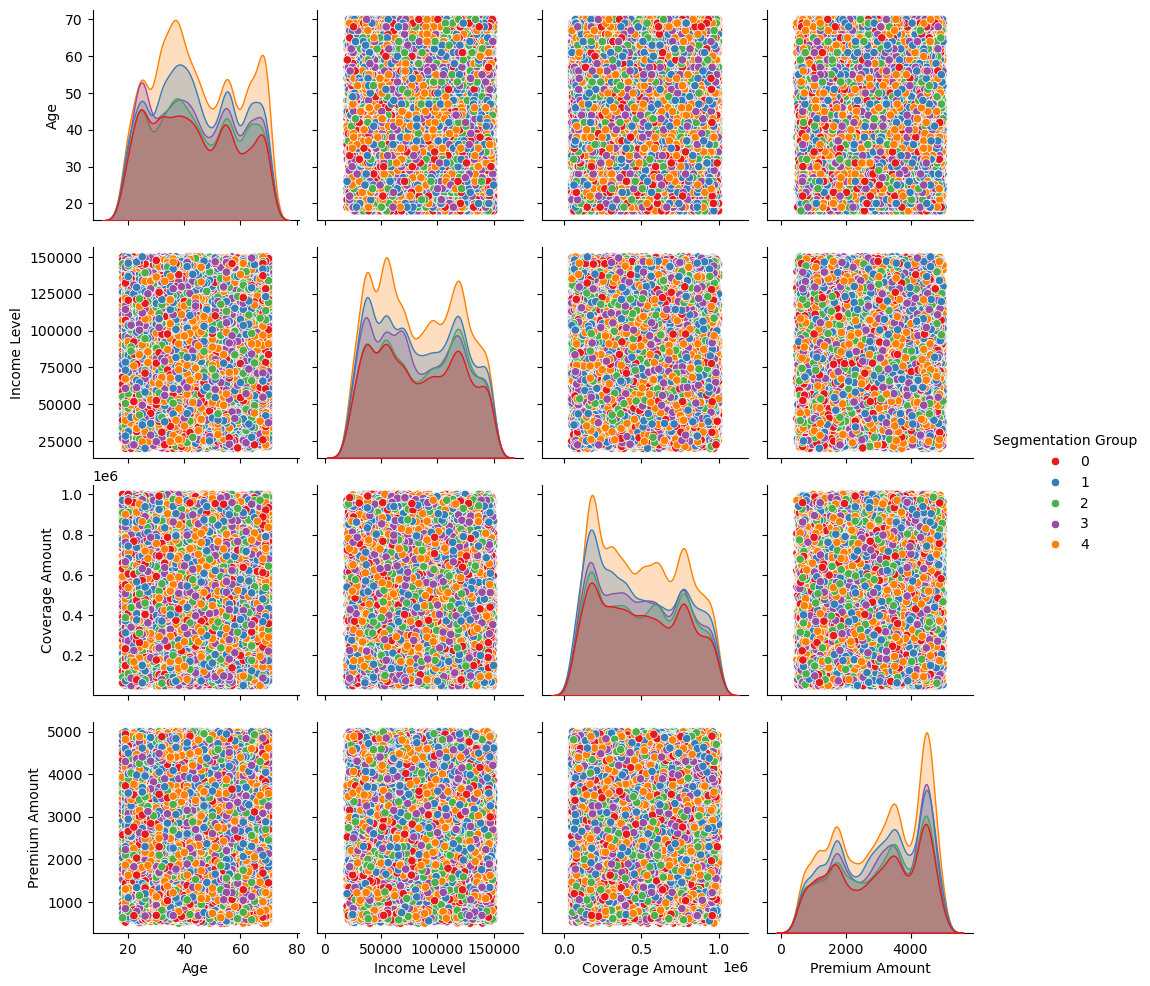

In [23]:
# Select a subset of features to visualize (numeric columns or important ones)
selected_columns = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount', 'Segmentation Group']

# Create the pairplot
sns.pairplot(df[selected_columns], diag_kind='kde', hue='Segmentation Group', palette='Set1')

# Show the plot
plt.show()

### Pairplot with regression lines

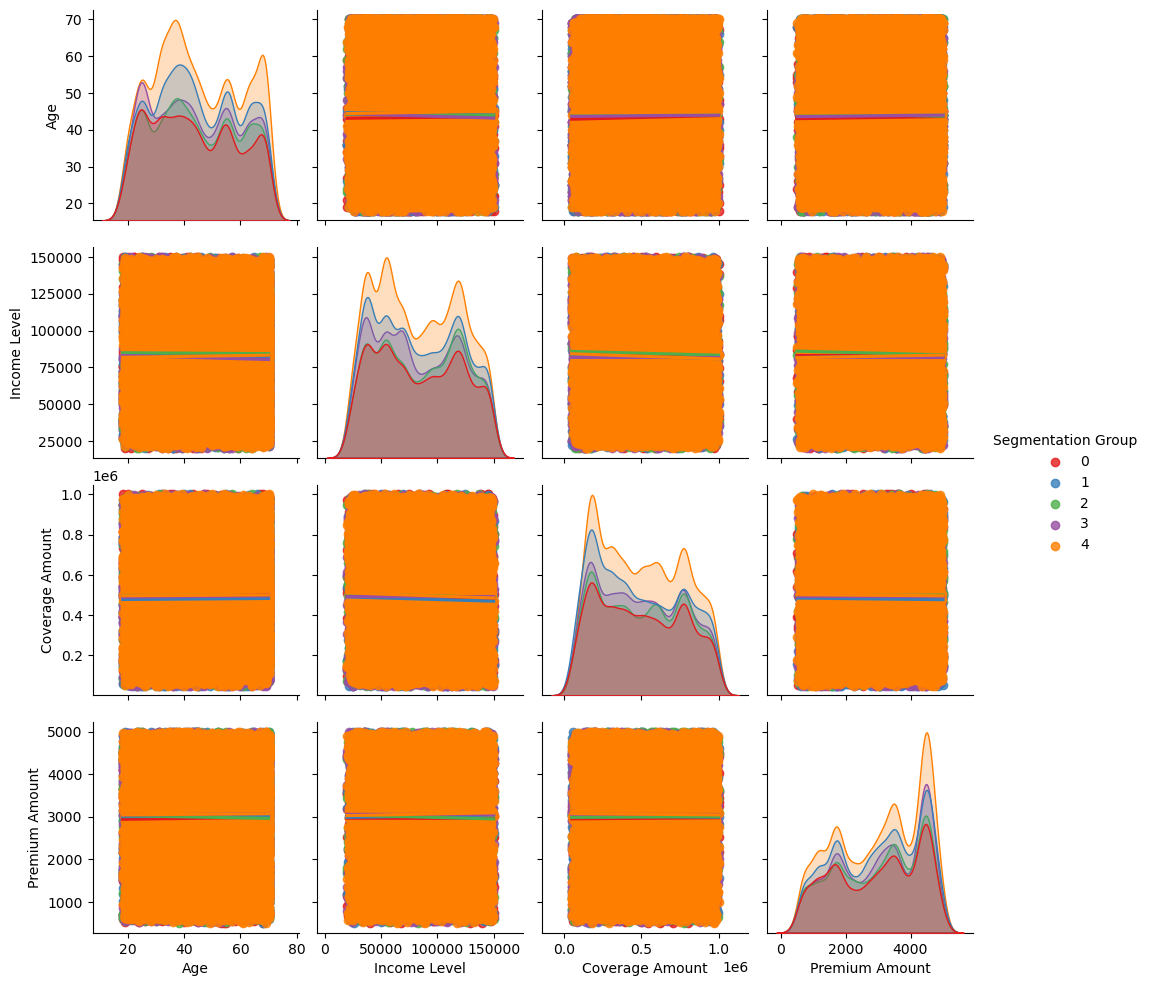

In [24]:
# Select a subset of features to visualize
selected_columns = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount', 'Segmentation Group']

# Create the pairplot with regression lines
sns.pairplot(df[selected_columns], diag_kind='kde', kind='reg', hue='Segmentation Group', palette='Set1')

# Show the plot
plt.show()

# Segmentation Group Analysis

###  Bar Plot of Segmentation Groups

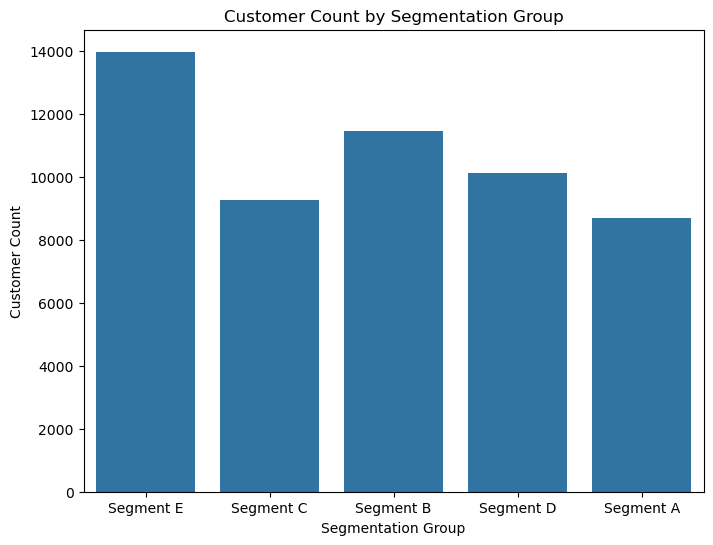

In [27]:
# Created a mapping for Segmentation Group to rename 0-5 to custom names
segmentation_mapping = {
    0: 'Segment A',
    1: 'Segment B',
    2: 'Segment C',
    3: 'Segment D',
    4: 'Segment E',
    5: 'Segment F'
}

# Apply the mapping (if you want to rename)
df['Segmentation Group'] = df['Segmentation Group'].map(segmentation_mapping)

# Bar plot for customer count in each Segmentation Group
plt.figure(figsize=(8, 6))
sns.countplot(x='Segmentation Group', data=df)
plt.title('Customer Count by Segmentation Group')
plt.xlabel('Segmentation Group')
plt.ylabel('Customer Count')
plt.show()

### Boxplot for Feature Distribution by Segmentation Group

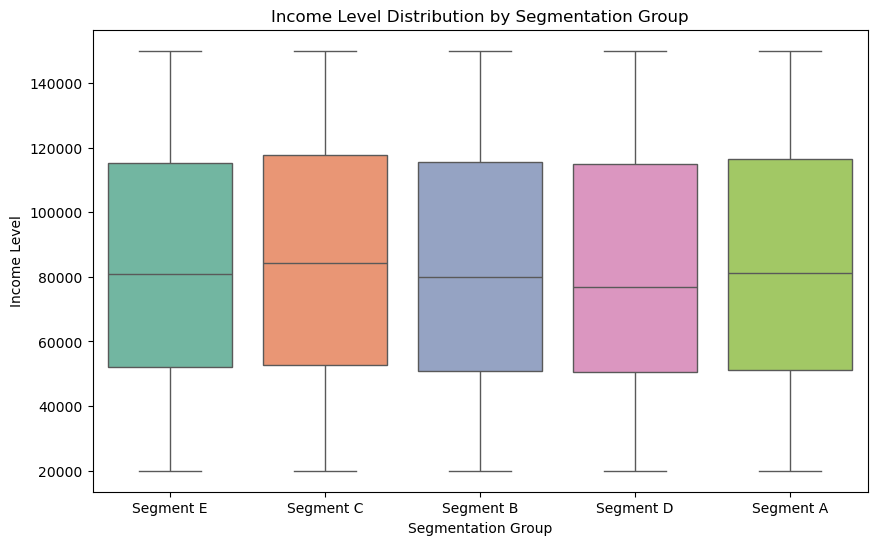

In [31]:
# Assigned 'Segmentation Group' to hue for different colors
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segmentation Group', y='Income Level', data=df, hue='Segmentation Group', palette='Set2', dodge=False)  
plt.title('Income Level Distribution by Segmentation Group')
plt.xlabel('Segmentation Group')
plt.ylabel('Income Level')
plt.legend([],[], frameon=False)  # Remove the extra legend since we're already coloring by hue
plt.show()

### Boxplots with Binned Age Data:


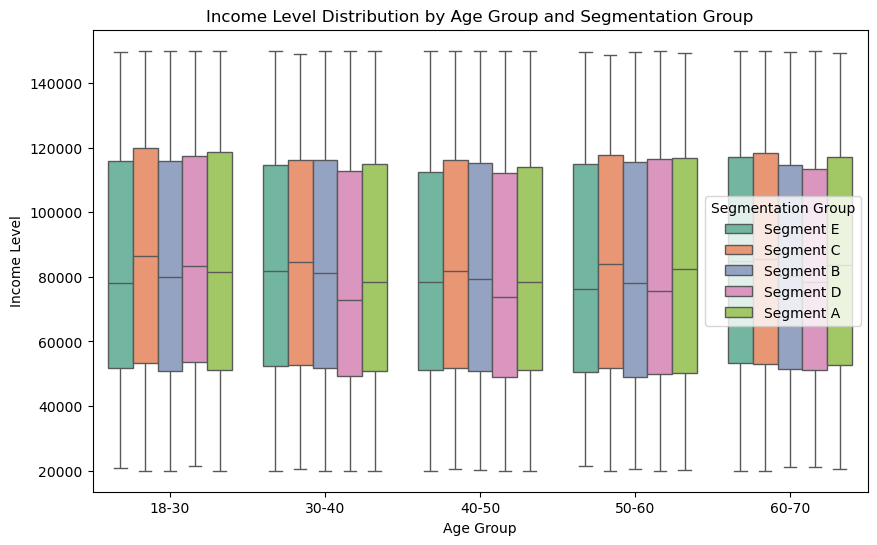

In [34]:
# Create Age Groups
df['Age Group'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 70], labels=['18-30', '30-40', '40-50', '50-60', '60-70'])

# Boxplot for Income Level by Age Group and Segmentation Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Income Level', hue='Segmentation Group', data=df, palette='Set2')
plt.title('Income Level Distribution by Age Group and Segmentation Group')
plt.show()

### Correlation Heatmap (To Explore Relationships)

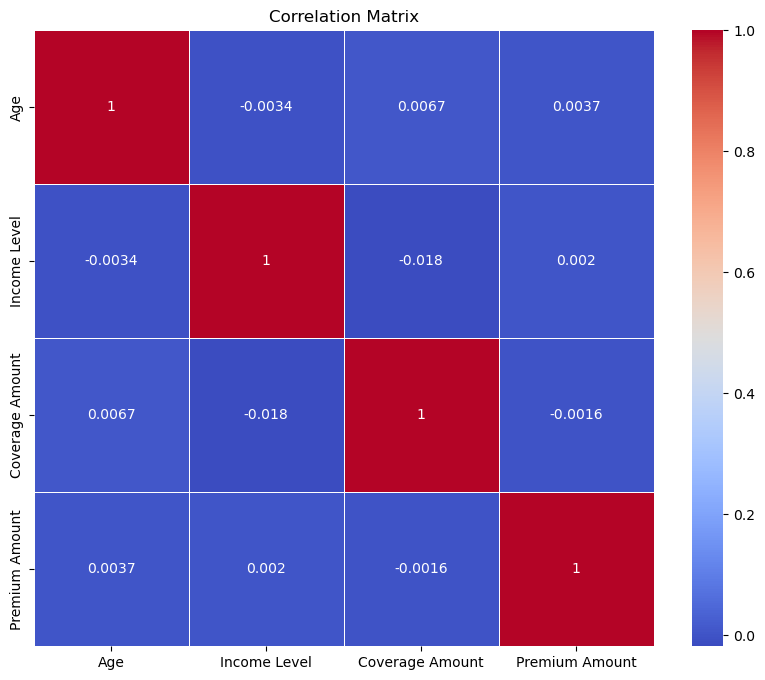

In [42]:
correlation_matrix = df[['Age', 'Income Level', 'Coverage Amount', 'Premium Amount']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Customer Segmentation Analysis Summary

## 1. **Income Level Distribution**
- **Insight**: The income level of customers is widely distributed with multiple peaks around $40,000, $100,000, and $120,000, suggesting there are different income brackets among customers.
- **Visualization**: A histogram and KDE plot for income level distribution.

---

## 2. **Segmentation Group Analysis**
- **Bar Plot**: The distribution of customers across segmentation groups shows that:
    - **Segment 5** has the highest number of customers.
    - **Segment 3** and **Segment 1** have the fewest customers.
- This could indicate that some segments are more popular or representative of a larger customer base.

- **Boxplot**: The income levels across different segmentation groups do not show significant differences. The median income levels appear to be similar across groups, though Segment E seems to have slightly higher variation.
- **Insight**: Income does not drastically vary by segmentation, suggesting that segmentation might be based on factors other than income alone.

---

## 3. **Age vs Income Level Analysis**
- **Hexbin Plot & 2D Histogram**: 
  - These plots reveal that **income levels** remain fairly consistent across **age groups**. 
  - Most customers have income levels between $60,000 and $120,000, regardless of age.
  - There are no strong trends showing that older or younger customers earn significantly more or less than others.

---

## 4. **Pairwise Feature Relationships**
- **Pairplot**: The pairwise plots for features such as Age, Income Level, Coverage Amount, and Premium Amount show that:
    - The distribution of age is mostly uniform across segmentation groups.
    - **Income levels** and **coverage amounts** show no significant differences by segmentation group.
    - **Premium amounts** show more variation, but no clear trends emerge from segmentation.
- **Regression lines in pairplot**: No significant linear relationships were found between the selected features. This implies that the relationships between features such as Age and Income Level, or Coverage Amount and Premium, are weak.

---

## 5. **Correlation Analysis**
- **Correlation Matrix**: The correlation analysis shows:
    - **Age** has almost no correlation with other variables like **Income Level** or **Coverage Amount**.
    - **Income Level** is weakly correlated with **Coverage Amount**, but the relationship is minimal.
    - **Premium Amount** is also very weakly correlated with other features, suggesting these variables are fairly independent.
- **Insight**: There are no strong correlations between the variables, indicating that customer segmentation is likely driven by a combination of multiple factors rather than any single dominant feature.

---

## 6. **Income Level by Age Group and Segmentation Group**
- **Boxplot**: This plot shows the distribution of income levels by age groups (e.g., 18-30, 30-40, etc.) across different segmentation groups.
  - Across all age groups, the income level remains fairly consistent across segmentation groups.
  - **Insight**: Segmentation is not strongly related to income differences across age groups, suggesting segmentation may rely more on other behavioral or demographic factors.
  
---
